In [ ]:
### Run the env
# cmd: source computer-vision-env/bin/activate

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
import matplotlib.pyplot as plt

def show_image(x_train, y_train, x_test, y_test):
    fig, axes = plt.subplots(1, 2)
    axes[0].set_title("Label: {}".format(y_train[0]))
    axes[0].imshow(x_train[0])

    axes[1].set_title("Label: {}".format(y_test[0]))
    axes[1].imshow(x_test[0])

    plt.show()

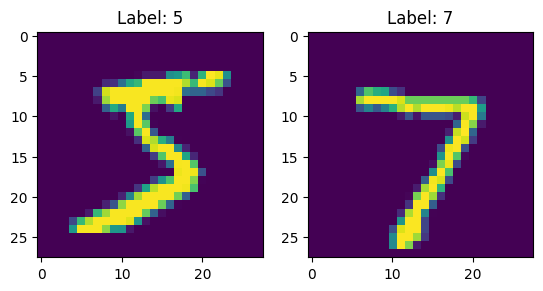

In [11]:
show_image(x_train, y_train, x_test, y_test)

1. 构建神经网络
2. 编译神经网络
3. 训练神经网络
4. 评估神经网络

优化：
1. 输入数据的归一化
2. 隐藏层添加正则化层 dropout
3. 全梯度下降改为小批量梯度下降，添加batch_size

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        # dropout 正则化
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

/Users/jiaronghe/Desktop/projects/python/computer-vision/computer-vision-env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128, # batch
)
model.evaluate(x_test, y_test)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9903 - loss: 0.0310
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9906 - loss: 0.0296
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9906 - loss: 0.0280
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9919 - loss: 0.0267
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0272
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9796 - loss: 0.0739


[0.06262680888175964, 0.982200026512146]